In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
data = []

directory = '../healthcare-concept-chain/samples'

for filename in os.listdir(directory):
    if filename.endswith('.json'):
        with open(os.path.join(directory, filename), 'r') as f:
            content_text = "".join(f.readlines()[4:])
            try:
                content = json.loads(content_text)
                for c in content['result']['result']:
                    if 'coding' in c:
                        display = c['coding']['display']
                        grade = c['selfAssessment']['grade']
                    else:
                        display = None
                        grade = None
                    data.append({
                        'display': display[:64],
                        'grade': grade,
                        'steps_length': len(content['steps'])
                    })
            except: pass

df = pd.DataFrame(data)


In [73]:
df

,display,grade,steps_length
0,Prosopagnosia (finding),A,3
1,Prosopagnosia (finding),A,3
2,Prosopagnosia (finding),A,3
3,Prosopagnosia (finding),A,5
4,Impairment (finding),A,6
...,...,...,...
58,Finding related to recognition (finding),A,5
59,Prosopagnosia (finding),A,5
60,Visual agnosia (disorder),A,5
61,Visual impairment (disorder),A,5


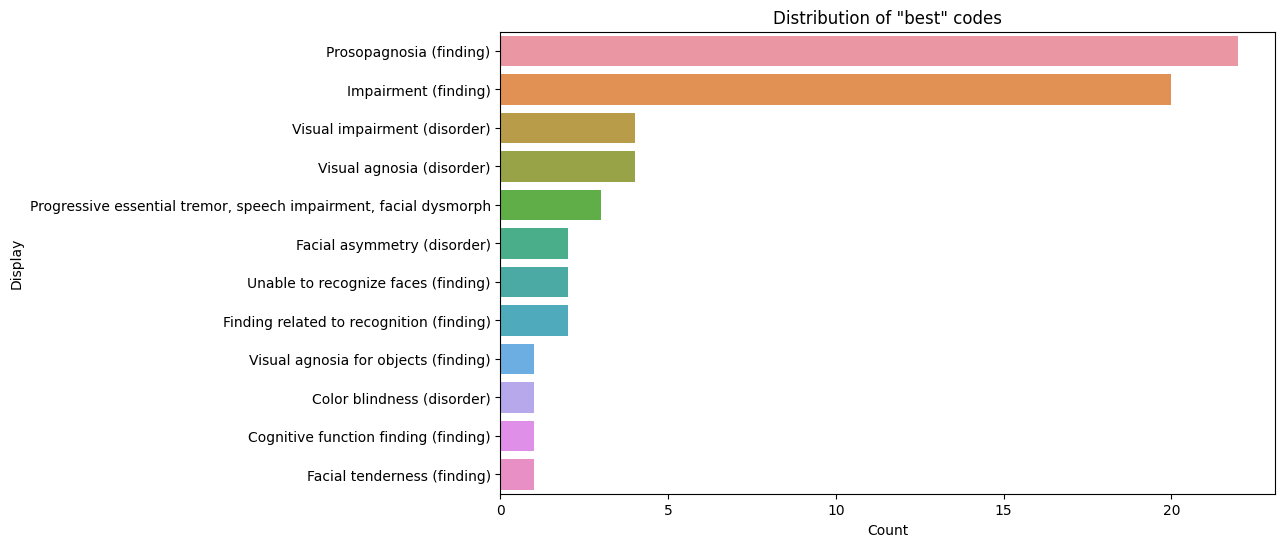

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='display', order=df['display'].value_counts().index)
plt.title('Distribution of "best" codes')
plt.xlabel('Count')
plt.ylabel('Display')
plt.show()


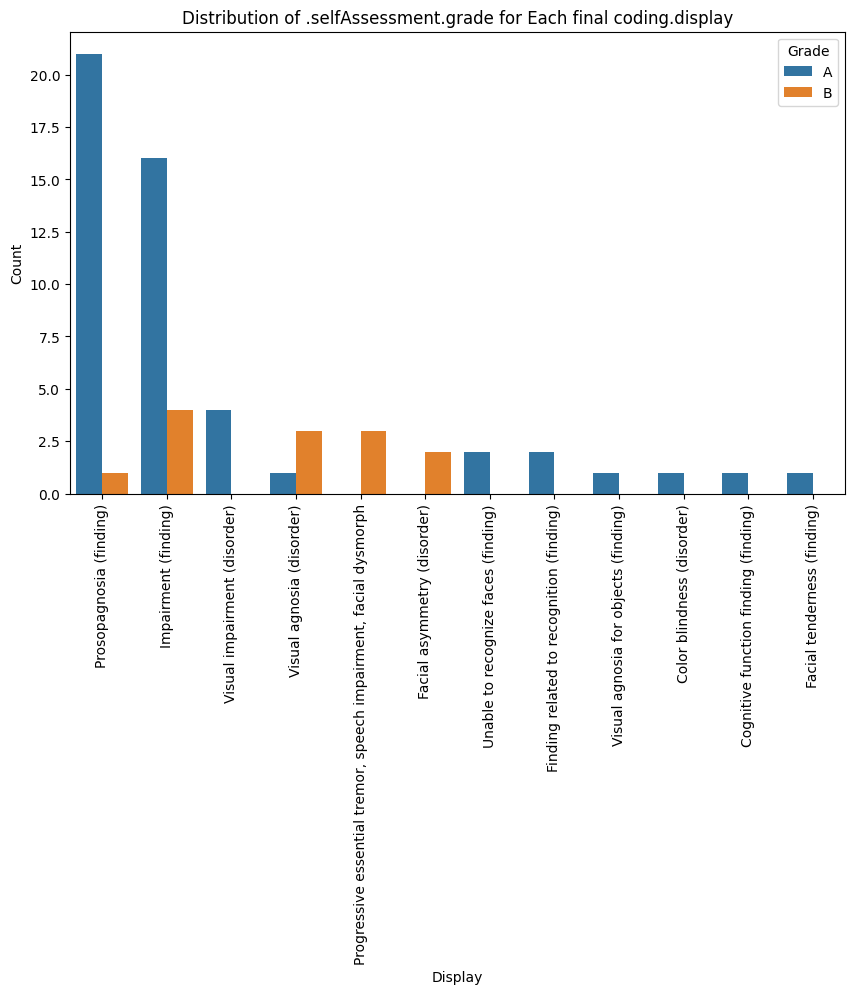

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='display', hue='grade', order=df['display'].value_counts().index)
plt.title('Distribution of .selfAssessment.grade for Each final coding.display')
plt.xlabel('Display')
plt.ylabel('Count')
plt.legend(title='Grade')
plt.xticks(rotation=90)
plt.show()


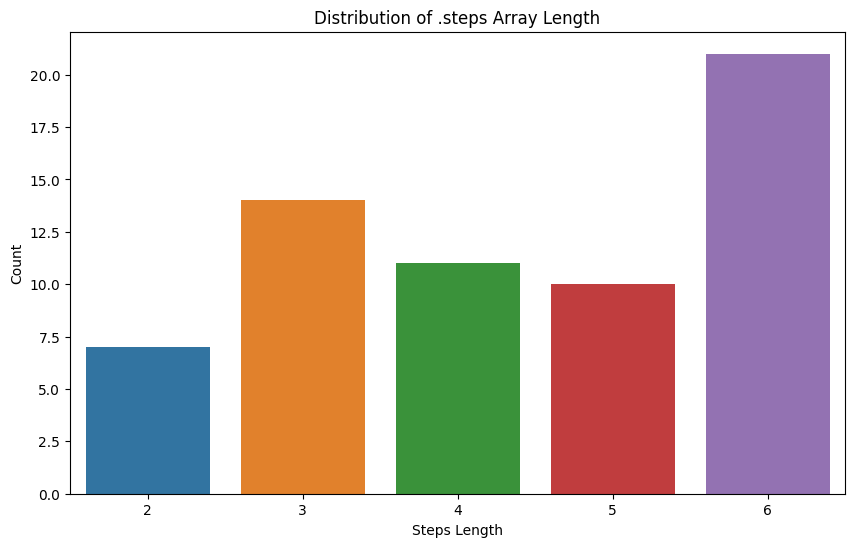

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='steps_length')
plt.title('Distribution of .steps Array Length')
plt.xlabel('Steps Length')
plt.ylabel('Count')
plt.show()


In [77]:
stepdata = []

directory = '../healthcare-concept-chain/samples'

for filename in os.listdir(directory):
    if filename.endswith('.json'):
        with open(os.path.join(directory, filename), 'r') as f:
            content_text = "".join(f.readlines()[4:])
            try:
                content = json.loads(content_text)
            except: continue

            for s in content['steps'][1:]:
                if not 'parsed' in s:
                    continue
                for c in s['parsed']['codings']:
                    display = None
                    grade = None
                    if 'display' in c and c['display']:
                        display = c['display'][:64]
                    if 'grade' in s['parsed']:
                        grade = s['parsed']['grade']
                    print("d",display, grade)
                    stepdata.append({
                        'display': display,
                        'grade': grade,
                    })

stepdf = pd.DataFrame(stepdata)


d Impairment (finding) B
d Prosopagnosia (finding) A
d Prosopagnosia (finding) A
d Impairment (finding) A
d Prosopagnosia (finding) A
d Impairment (finding) A
d Visual agnosia (disorder) B
d Impairment (finding) A
d Prosopagnosia (finding) A
d Impairment (finding) A
d Prosopagnosia (finding) A
d Color blindness (disorder) B
d Impairment (finding) A
d Prosopagnosia (finding) B
d Face-to-face encounter (procedure) B
d Prosopagnosia (finding) A
d Finding related to recognition A
d None C
d Visual agnosia (disorder) B
d Prosopagnosia (finding) A
d Prosopagnosia (finding) B
d XR Facial bones Views B
d Prosopagnosia (finding) B
d N/A B
d Impairment (finding) A
d Impairment (finding) A
d Visual impairment (disorder) A
d Impairment (finding) A
d Progressive essential tremor, speech impairment, facial dysmorph B
d Impairment (finding) A
d Impairment (finding) A
d Prosopagnosia (finding) A
d Facial asymmetry (disorder) B
d Impairment (finding) A
d Prosopagnosia (finding) A
d Visual agnosia prese

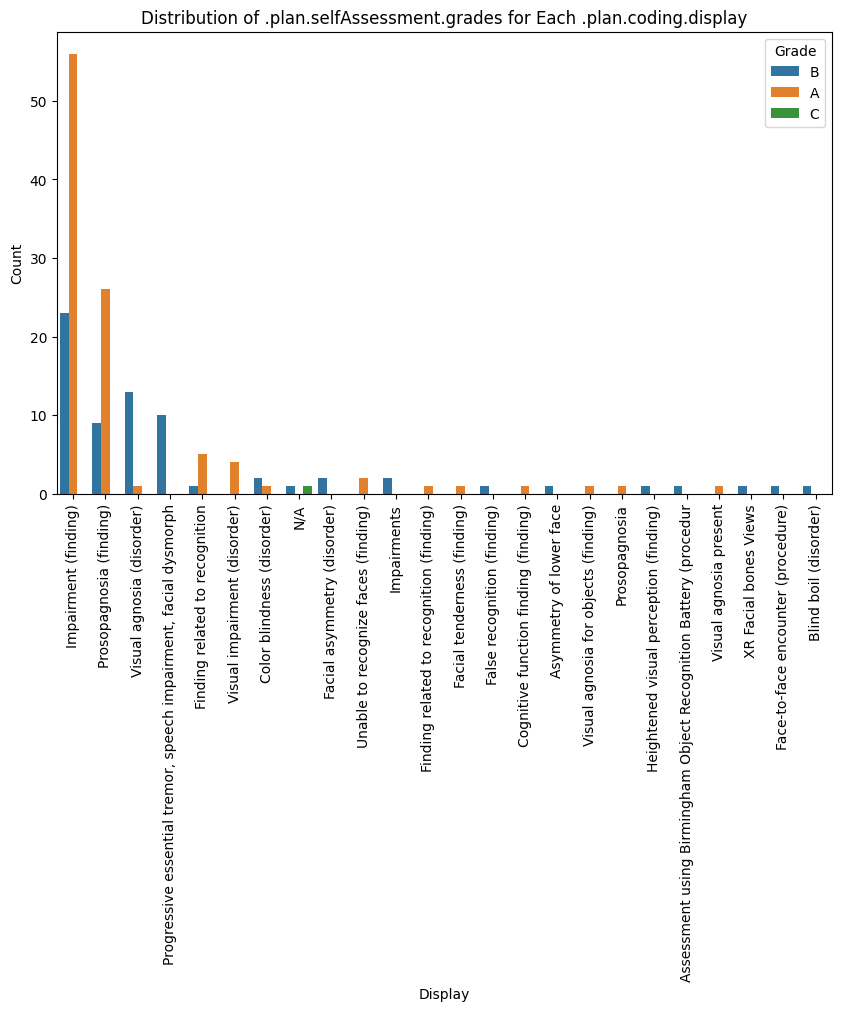

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=stepdf, x='display', hue='grade', order=stepdf['display'].value_counts().index)
plt.title('Distribution of .plan.selfAssessment.grades for Each .plan.coding.display')
plt.xlabel('Display')
plt.ylabel('Count')
plt.legend(title='Grade')
plt.xticks(rotation=90)
plt.show()
